(19, 4)


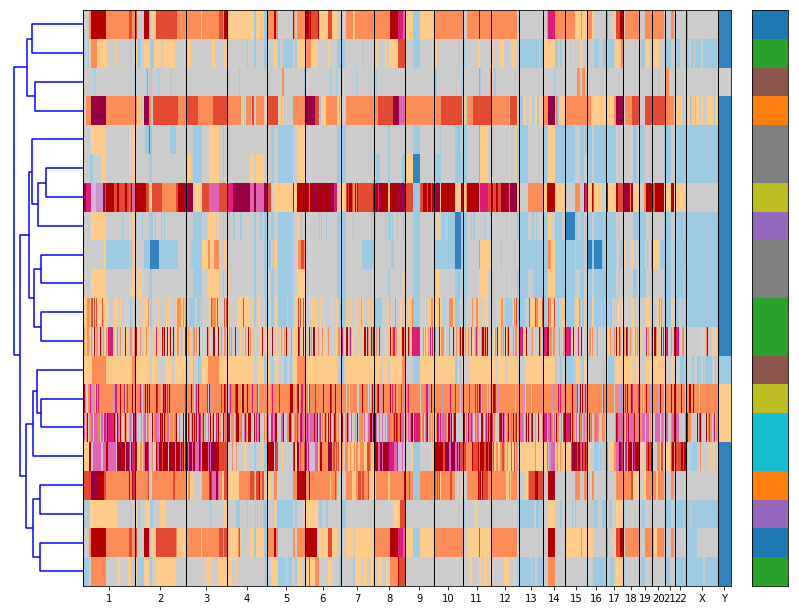

In [3]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
import scgenome.cncluster
import scgenome.cnplot
import pandas as pd
import numpy as np

biplot_data = pd.read_csv("~/data/biplot_data.csv").to_numpy()[:, 1:]
print(biplot_data.shape)
bi_cn_data = pd.read_csv("~/data/bi_cn_data.csv")
bi_cn_ids = np.array([
    'cl1_SA921-A90554A-R05-C57', 'cl1_SA921-A90554A-R08-C54',
    'cl1_SA921-A90554A-R08-C55', 'cl1_SA921-A90554A-R08-C56',
    'cl1_SA921-A90554A-R08-C57', 'cl1_SA921-A90554A-R11-C16',
    'cl1_SA921-A90554A-R12-C03', 'cl1_SA921-A90554A-R12-C05',
    'cl1_SA921-A90554A-R12-C07', 'cl1_SA921-A90554A-R12-C09',
    'cl2_SA1090-A96213A-R22-C06', 'cl2_SA1090-A96213A-R28-C12',
    'cl2_SA1090-A96213A-R28-C13', 'cl2_SA1090-A96213A-R28-C18',
    'cl2_SA1090-A96213A-R28-C19', 'cl2_SA1090-A96213A-R32-C60',
    'cl2_SA1090-A96213A-R34-C60', 'cl2_SA1090-A96213A-R34-C62',
    'cl2_SA1090-A96213A-R34-C63', 'cl2_SA1090-A96213A-R34-C64'])

biplot_data[:, 2] = np.log(biplot_data[:, 2])
bifclustering = fcluster(biplot_data, 1.1)
bi_cn_data = scgenome.cncluster.prune_cluster(bifclustering, bi_cn_ids, 
                                              bi_cn_data)

fig = plt.figure(figsize=(10, 8))
bimatrix_data = scgenome.cnplot.plot_clustered_cell_cn_matrix_figure(
    fig, bi_cn_data, "state", cluster_field_name="bhc_cluster_id",
    linkage=biplot_data)